### Import packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np 

# classes and functions needed from this mdule
from radial_split import RadialSplitter
from color_density import ColorDensity
from plotting_functions import plot_radial_splits, bar_color_map, plot_color_histogram

# example image from unsplash.com
image = 'unsplash_vincentphinny_qeW0Wckijho.jpg'

### Example image with no splitting

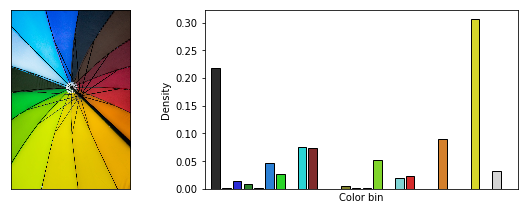

In [2]:
# set up figure, with more width for histogram side
fig = plt.figure(figsize=(8,3), constrained_layout=False)
gspec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1.5])
ax = {0:fig.add_subplot(gspec[0]), 1:fig.add_subplot(gspec[1]) }

# add histogram with no splitter
cd = ColorDensity(splitter=None, n_bins=3)
plot_color_histogram(image, cd, ax[1])

# add image
ax[0].imshow(plt.imread(image)), ax[0].set_xticks([]), ax[0].set_yticks([])
plt.tight_layout(pad=1)
plt.savefig('plots/example1.png', dpi=72, format='png')

### Example image with 4 segments

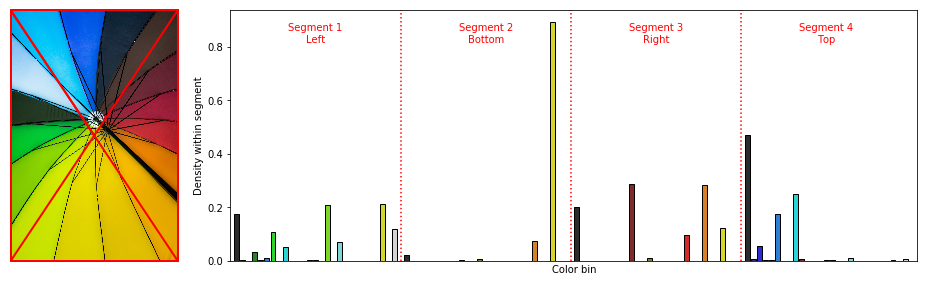

In [3]:
# set up figure, with more width for histogram side
fig = plt.figure(figsize=(13,4), constrained_layout=False)
gspec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,4])
ax = {0:fig.add_subplot(gspec[0]), 1:fig.add_subplot(gspec[1]) }

# add histogram with no splitter
rs = RadialSplitter(nrings=1, nqslices=1)
cd = ColorDensity(splitter=rs, n_bins=3)
plot_color_histogram(image, cd, ax[1], annot=['Left','Bottom','Right','Top'])

# add image
plot_radial_splits(image, rs, ax[0])
plt.tight_layout(pad=1)
plt.savefig('plots/example2.png', dpi=72, format='png')

### Example image with 8 segments

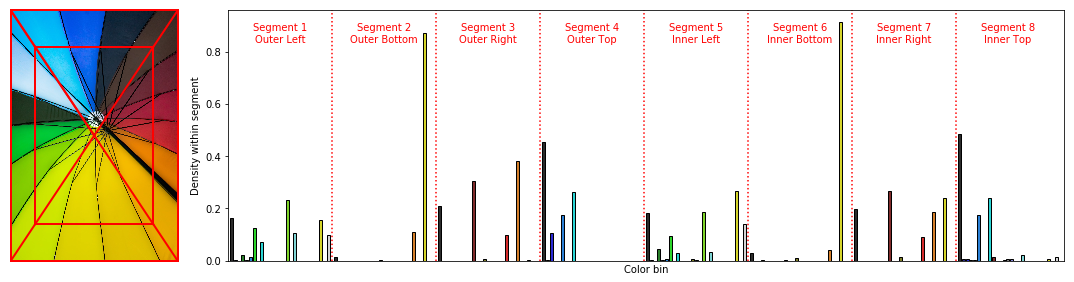

In [4]:
# set up figure, with more width for histogram side
fig = plt.figure(figsize=(15,4), constrained_layout=False)
gspec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,5])
ax = {0:fig.add_subplot(gspec[0]), 1:fig.add_subplot(gspec[1]) }

# add histogram with no splitter
rs = RadialSplitter(nrings=2, nqslices=1)
cd = ColorDensity(splitter=rs, n_bins=3)
plot_color_histogram(image, cd, ax[1], 
        annot=['Outer Left','Outer Bottom','Outer Right','Outer Top',
               'Inner Left','Inner Bottom','Inner Right','Inner Top'])

# add image
plot_radial_splits(image, rs, ax[0])
plt.tight_layout(pad=1)
plt.savefig('plots/example3.png', dpi=72, format='png')

### Batch processing of images for model inputs

In [5]:
# define the splitter and color density objects 
rs = RadialSplitter(nrings=2, nqslices=1)
cd = ColorDensity(splitter=rs, n_bins=4, scaler=True) # scaler=True to use a MinMaxScaler

# create a dummy list of train & test data
train_files = ['plots/example1.png', 'plots/example2.png', 'plots/example3.png']
test_files = [image]

# to get our training data we call fit_transform (beacuse there is a scaler being used)
X_train = cd.fit_transform(train_files)
print('X_train data shape = {}'.format(X_train.shape))

# for test data we called 'transform' because the scaler was fit using the training data
X_test = cd.transform(test_files)
print('X_test data shape = {}'.format(X_test.shape))

X_train data shape = (3, 512)
X_test data shape = (1, 512)
